In [ ]:
# Execute this cell to install dependencies
%pip install sf-hamilton[visualization]

# Vaex + Hamilton integration [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dagworks-inc/hamilton/blob/main/examples/vaex/notebook.ipynb) [![GitHub badge](https://img.shields.io/badge/github-view_source-2b3137?logo=github)](https://github.com/dagworks-inc/hamilton/blob/main/examples/vaex/notebook.ipynb)


In [2]:
from hamilton import base, driver
from hamilton.plugins import vaex_extensions, h_vaex

/Users/konstantin/.miniconda3/envs/hamilton-vaex/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/konstantin/.miniconda3/envs/hamilton-vaex/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import my_functions

config = {
    "base_df_location": "dummy_value",
}
adapter = base.SimplePythonGraphAdapter(result_builder=h_vaex.VaexDataFrameResult())
dr = driver.Driver(config, my_functions, adapter=adapter)
output_columns = [
    "spend",
    "signups",
    "spend_per_signup",
    "spend_std_dev",
    "spend_mean",
    "spend_zero_mean_unit_variance",
]
df = dr.execute(output_columns)

In [4]:
print(df)

  #    spend    signups    spend_per_signup    spend_zero_mean_unit_variance    spend_std_dev    spend_mean
  0       10          1              10                            -1.166             15.7233       28.3333
  1       10         10               1                            -1.166             15.7233       28.3333
  2       20         50               0.4                          -0.529999          15.7233       28.3333
  3       40        100               0.4                           0.741999          15.7233       28.3333
  4       40        200               0.2                           0.741999          15.7233       28.3333
  5       50        400               0.125                         1.378             15.7233       28.3333


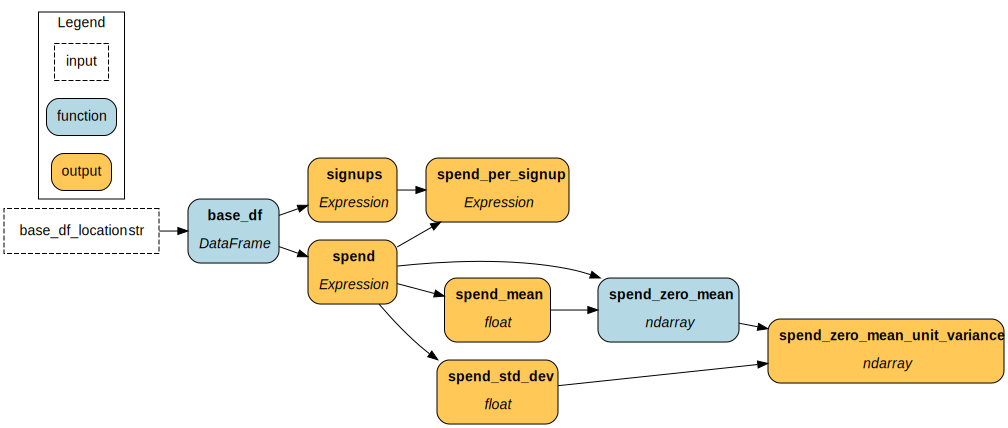

In [5]:
dr.visualize_execution(output_columns)

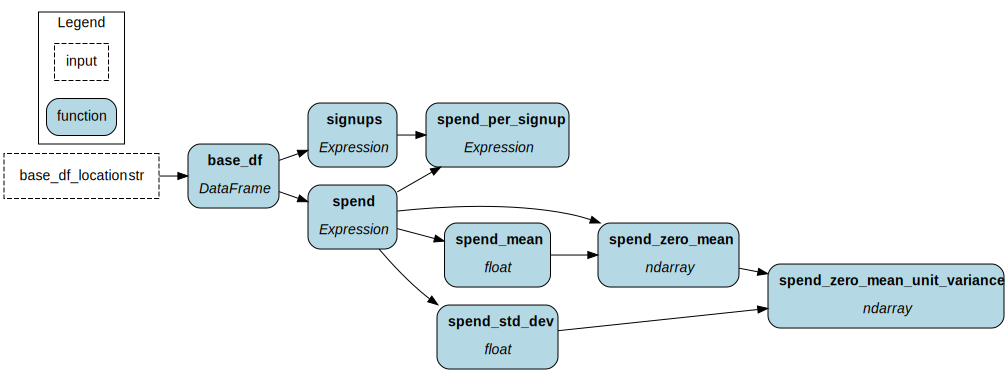

In [6]:
dr.display_all_functions()